In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [2]:
from batty import BAT_sampler, BAT, Distributions

/mnt/c/Users/peller/work/batty/batty.py:6: UserWarning: Not able to use compiled modules, resulting in (very) slow import
 See https://pyjulia.readthedocs.io/en/latest/troubleshooting.html
  warnings.warn("Not able to use compiled modules, resulting in (very) slow import\n See https://pyjulia.readthedocs.io/en/latest/troubleshooting.html")


In [ ]:
%matplotlib inline

# Minimal Example

In [3]:
sampler = BAT_sampler(llh=lambda x : -0.5 * x**2, prior_specs=Distributions.Uniform(-3, 3))

In [16]:
result = sampler.run()

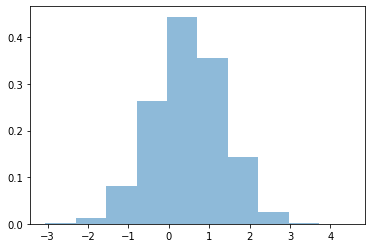

In [24]:
plt.hist(result.v, weights=result.weight, density=True, alpha=0.5);

# More Complicated Example

In [8]:
s = np.random.rand(2,2)
prior_specs = {'a' : Distributions.Uniform(-3,3), 'b' : Distributions.MvNormal([1,1], s@s.T), }

In [9]:
def llh(x, d):
    return -0.5 * ((x.b[0] - d[0])**2 + (x.b[1] - d[1])**2/4) - x.a

In [10]:
d = [-1, 1]

In [11]:
sampler = BAT_sampler(llh, prior_specs, llh_args=(d,), mcalg=BAT.MetropolisHastings(weighting=BAT.ARPWeighting()))

In [12]:
%%time
sampler.run(nsteps=1e3, nchains=3);

CPU times: user 20.7 s, sys: 491 ms, total: 21.2 s
Wall time: 21.1 s


<Array [{weight: 11.5, logd: -1.28, ... ] type='2856 * {"weight": float64, "logd...'>

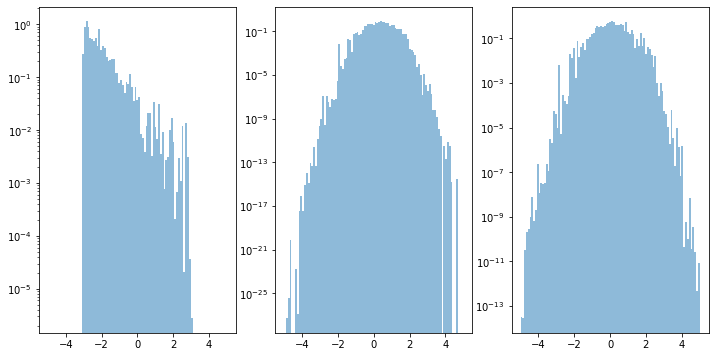

In [14]:
fig, ax = plt.subplots(1, 3, figsize=(12,6))

bins = np.linspace(-5,5,100)

ax[0].hist(sampler.result.v.a, weights=sampler.result.weight, bins=bins, density=True, alpha=0.5);
ax[1].hist(sampler.result.v.b[:,0], weights=sampler.result.weight, bins=bins, density=True, alpha=0.5);
ax[2].hist(sampler.result.v.b[:,1], weights=sampler.result.weight, bins=bins, density=True, alpha=0.5);

ax[0].set_yscale('log')
ax[1].set_yscale('log')
ax[2].set_yscale('log')